In [478]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             recall_score, precision_score, f1_score)
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [479]:
# We lead the data.
df_19 = pd.read_csv('Jan_2019_ontime.csv')
df_20 = pd.read_csv('Jan_2020_ontime.csv')

# 1. Knowing the data

In [480]:
# First look at the data
df_19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [481]:
# Detailled information abou the data
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [482]:
# We see the 2020 data.
df_20.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [483]:
# We see the 2020 info.
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [484]:
# Describing outcome variable in 2019
df_19['ARR_DEL15'].describe()

count    565963.000000
mean          0.185917
std           0.389040
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ARR_DEL15, dtype: float64

In [485]:
# Describing outcome variable in 2019
df_20['ARR_DEL15'].describe()

count    599268.000000
mean          0.137309
std           0.344174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ARR_DEL15, dtype: float64

In [486]:
# Checking if the data sets have the same columns so we can later merge them.
print(list(df_20.columns) == list(df_19.columns))

True


# 2. Data preparation

In [487]:
# Checking all categorical data
df_19.select_dtypes(include=['object']).columns

Index(['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME_BLK'],
      dtype='object')

In [488]:
# Checking all numerical data (int and float)
df_19.select_dtypes(include=['float64','int64']).columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEP_TIME', 'DEP_DEL15',
       'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE',
       'Unnamed: 21'],
      dtype='object')

In [489]:
# Checking all categorical data
df_20.select_dtypes(include=['object']).columns

Index(['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME_BLK'],
      dtype='object')

In [490]:
# Checking all numerical data (int and float)
df_20.select_dtypes(include=['float64','int64']).columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEP_TIME', 'DEP_DEL15',
       'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE',
       'Unnamed: 21'],
      dtype='object')

## Preparing the merger of both datasets

In [491]:
# Creating a column for each dataset to then concatenate both datasets
df_19['YEAR'] = 2019
df_20['YEAR'] = 2020

# Checking if 'YEAR' is in both datasets
if 'YEAR' in df_19.columns and 'YEAR' in df_20.columns:
    print(True)
else:
    print(False)

True


In [492]:
print('2019 dataset shape ' + str(df_19.shape))
print('2020 dataset shape ' + str(df_20.shape))

# Creating one dataset
data = pd.concat([df_19,df_20])
print('Unique dataset shape ' + str(data.shape))

2019 dataset shape (583985, 23)
2020 dataset shape (607346, 23)
Unique dataset shape (1191331, 23)


In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191331 entries, 0 to 607345
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float64
 14  DEP_DEL15          

## Concatenation of arrival and departure delay 
Instead of doing multi classification, we will merge both clumns in one column (boolean). Notice that the data doesn't provide us with the exact amount of time delayed, so we only want to know if the flight was delayed or not.

In [494]:
data['DELAYED'] = (data['ARR_DEL15'].astype(bool) | data['DEP_DEL15'].astype(bool)).astype(int)
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,YEAR,DELAYED
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019,0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019,0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019,0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019,0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019,0


## Ploting the delay percentage per airline

In [495]:
# Replacing the carrier code by full airline names
cc = pd.read_csv('carrier_codes.csv', sep=";")

# Creating a dictionary from the first and third columns
rename_dict = dict(zip(cc.iloc[:, 0], cc.iloc[:, 2]))

# Replacing the values in the first column with the corresponding values from the dictionary
data["AIRLINE"] = data["OP_UNIQUE_CARRIER"].replace(rename_dict)

data["AIRLINE"].unique()

array(['Endeavor Air', 'American Airlines', 'Envoy Air',
       'Allegiant Air LLC', 'Jetstream Intl',
       'Jetblue Airways Corporation', 'Mesa Airlines, Inc.',
       'ExpressJet Airlines', 'Frontier Airlines, Inc.',
       'Republic Airlines', 'Hawaiian Airlines Inc.',
       'Spirit Airlines, Inc.', 'Skywest Airlines', 'Southwest Airlines',
       'Alaska Airlines', 'United Airlines, Inc.',
       'Delta Air Lines, Inc.'], dtype=object)

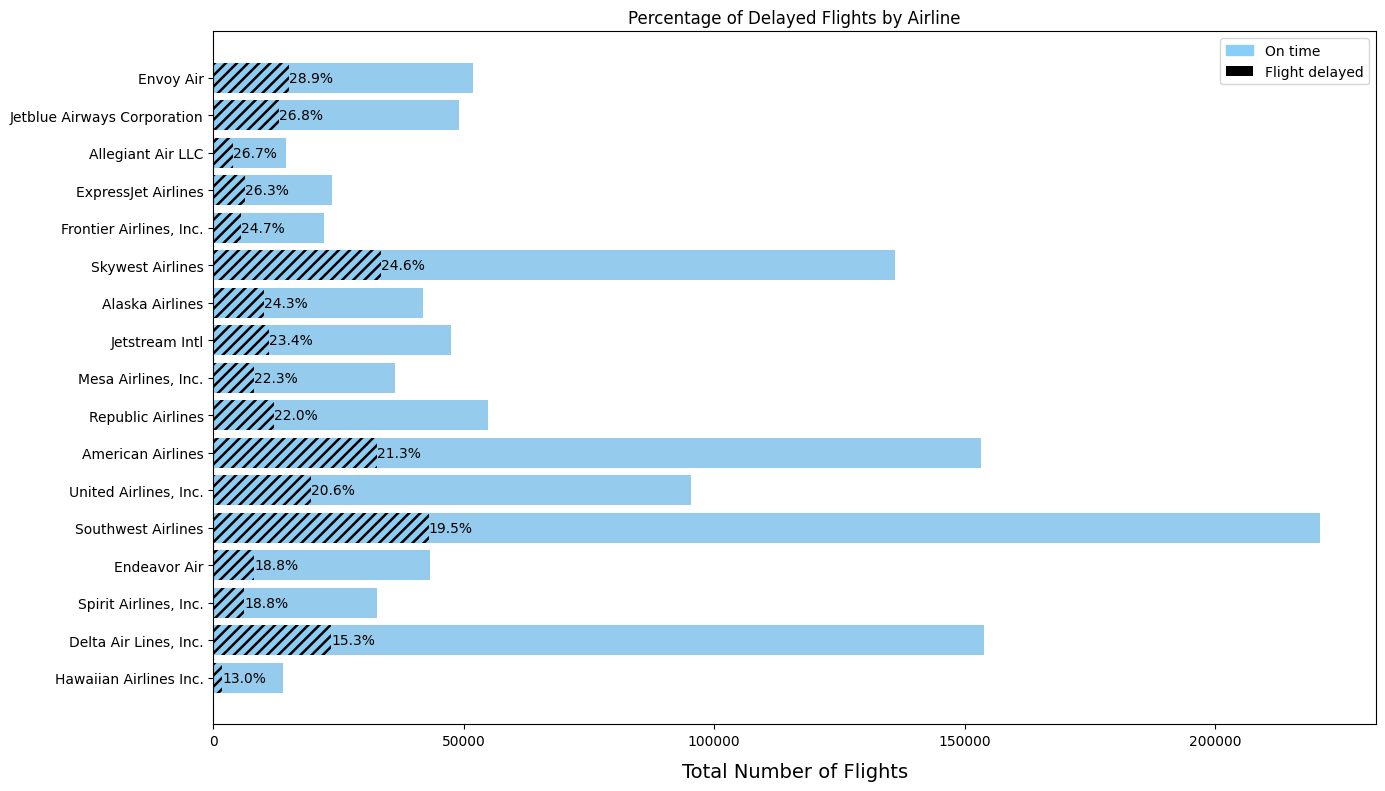

In [496]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8

# Calculate the percentage of delayed flights per airline
df_delayed = data.groupby('AIRLINE').agg({'DELAYED': 'sum', 'YEAR': 'count'})
df_delayed['DELAY_PERCENTAGE'] = df_delayed['DELAYED'] / df_delayed['YEAR']

# Sort the DataFrame by percentage delay in descending order
df_delayed = df_delayed.sort_values('DELAY_PERCENTAGE', ascending=False)

fig = plt.figure(1, figsize=(15, 9))
ax = sns.barplot(x="YEAR", y=df_delayed.index, data=df_delayed, color="lightskyblue", errorbar=None)

# Use the percentage of delayed flights to set the hatch line
for i, (index, row) in enumerate(df_delayed.iterrows()):
    x = row['DELAY_PERCENTAGE']
    total_flights = row['YEAR']
    delayed_flights = row['DELAYED']
    
    # Draw the hatched bar using ax.barh()
    ax.barh(i, delayed_flights, color="lightskyblue", hatch='///', alpha=0.5, linewidth=1.8)

    # Add percentage text above the hatch area
    ax.text(delayed_flights, i, f"{x * 100:.1f}%", color='black', ha='left', va='center', fontsize=10)

ax.yaxis.label.set_visible(False)
plt.title('Percentage of Delayed Flights by Airline')
plt.xlabel('Total Number of Flights', fontsize=14, labelpad=10)

# Create custom legend handles and labels
handles = [Patch(facecolor='lightskyblue', edgecolor='lightskyblue', label='On time'),
           Patch(facecolor='black', hatch='///', linewidth=1.8, label='Flight delayed')]

plt.legend(handles=handles, loc='best')
plt.show()

In [497]:
# Showing the percentage of delayed flights including cancellations and divertions
average_delay_percentage = (data['DELAYED'].sum() / data['DELAYED'].count()).mean() * 100
print(f"Delayed, cancelled or diverted flights: {average_delay_percentage:.2f}%")

Delayed, cancelled or diverted flights: 21.29%


## Dropping irrelevant columns for model prediction

In [498]:
# Getting rid of unnecessary columns
data.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID',
            'ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21',
            'OP_CARRIER', 'AIRLINE','ARR_DEL15','DEP_DEL15'], axis=1, inplace=True)

data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,YEAR,DELAYED
0,1,2,9E,GNV,ATL,601.0,0600-0659,722.0,0.0,0.0,300.0,2019,0
1,1,2,9E,MSP,CVG,1359.0,1400-1459,1633.0,0.0,0.0,596.0,2019,0
2,1,2,9E,DTW,CVG,1215.0,1200-1259,1329.0,0.0,0.0,229.0,2019,0
3,1,2,9E,TLH,ATL,1521.0,1500-1559,1625.0,0.0,0.0,223.0,2019,0
4,1,2,9E,ATL,FSM,1847.0,1900-1959,1940.0,0.0,0.0,579.0,2019,0


## Detecting null or empty values
We can see that there are only null values in the DEP_TIME and ARR_TIME variables. This can be attributed to the cancelled or diverted flights since these flights either don't have a departure time (for cancelled flights) of arrival time.

In [499]:
print(data.isna().sum())

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
ORIGIN                   0
DEST                     0
DEP_TIME             23016
DEP_TIME_BLK             0
ARR_TIME             24136
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
YEAR                     0
DELAYED                  0
dtype: int64


## Splitting the problem
1. Predicting if a flight will be delayed or not.
2. Predicting if a flight will be cancelled or not.
3. Predicting if a flight will be diverted or not.

A flight delay, cancellation or divertion means a different cost for the company, so it makes sence to predict these cases separately. 

In [500]:
# Checking number of canceled flights
cancelled_flights_num = (data['CANCELLED'] == 1).sum()
print('Number of cancelled flights in dataset: ' + str(cancelled_flights_num))

# Checking number of diverted flights
diverted_flights_num = (data['DIVERTED'] == 1).sum()
print('Number of diverted flights in dataset: ' + str(diverted_flights_num))

Number of cancelled flights in dataset: 23654
Number of diverted flights in dataset: 2446


## A. Creating dataset for cancelled flights

In [501]:
cancelled_flights = data[data['CANCELLED'] == 1].copy()
cancelled_flights.drop(['DIVERTED'], axis=1, inplace=True)
cancelled_flights.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DISTANCE,YEAR,DELAYED
397,1,2,AA,PBI,ORD,NaN,0600-0659,NaN,1.0,1143.0,2019,1
403,1,2,AA,EGE,DFW,NaN,0700-0759,NaN,1.0,721.0,2019,1
971,1,2,OH,CLT,PNS,1953.0,1900-1959,NaN,1.0,488.0,2019,1
1973,1,2,EV,JAN,IAH,NaN,0900-0959,NaN,1.0,351.0,2019,1
1975,1,2,EV,IAH,JAN,NaN,0700-0759,NaN,1.0,351.0,2019,1


In [502]:
null_rows_cancelled = cancelled_flights[cancelled_flights.isna().any(axis=1)]
null_rows_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23654 entries, 397 to 604891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DAY_OF_MONTH       23654 non-null  int64  
 1   DAY_OF_WEEK        23654 non-null  int64  
 2   OP_UNIQUE_CARRIER  23654 non-null  object 
 3   ORIGIN             23654 non-null  object 
 4   DEST               23654 non-null  object 
 5   DEP_TIME           638 non-null    float64
 6   DEP_TIME_BLK       23654 non-null  object 
 7   ARR_TIME           0 non-null      float64
 8   CANCELLED          23654 non-null  float64
 9   DISTANCE           23654 non-null  float64
 10  YEAR               23654 non-null  int64  
 11  DELAYED            23654 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 2.3+ MB


### Summary: arrival time is always null for the cancelled flights:

In [503]:
print(f'Number of rows with ARR_TIME null: {cancelled_flights["ARR_TIME"].isnull().sum()}')
print(f'Number of rows with DEP_TIME null: {cancelled_flights["DEP_TIME"].isnull().sum()}')

Number of rows with ARR_TIME null: 23654
Number of rows with DEP_TIME null: 23016


## B. Creating dataset for diverted flights

In [504]:
diverted_flights = data[data['DIVERTED'] == 1].copy()
diverted_flights.drop(['CANCELLED'], axis=1, inplace=True)
diverted_flights.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DIVERTED,DISTANCE,YEAR,DELAYED
1250,1,2,B6,BUR,JFK,2203.0,2100-2159,709.0,1.0,2465.0,2019,1
1633,1,2,B6,JAX,BOS,1201.0,1200-1259,1810.0,1.0,1010.0,2019,1
1866,1,2,B6,BUR,BOS,2040.0,2000-2059,610.0,1.0,2601.0,2019,1
1868,1,2,B6,BUR,JFK,1500.0,1400-1459,43.0,1.0,2465.0,2019,1
1879,1,2,B6,BOS,MCO,934.0,0900-0959,1456.0,1.0,1121.0,2019,1


### Summary: there are only 482 null values and it's only for the variable ARR_TIME:

In [505]:
null_rows_diverted = diverted_flights[diverted_flights.isna().any(axis=1)]
null_rows_diverted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 4642 to 603324
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DAY_OF_MONTH       482 non-null    int64  
 1   DAY_OF_WEEK        482 non-null    int64  
 2   OP_UNIQUE_CARRIER  482 non-null    object 
 3   ORIGIN             482 non-null    object 
 4   DEST               482 non-null    object 
 5   DEP_TIME           482 non-null    float64
 6   DEP_TIME_BLK       482 non-null    object 
 7   ARR_TIME           0 non-null      float64
 8   DIVERTED           482 non-null    float64
 9   DISTANCE           482 non-null    float64
 10  YEAR               482 non-null    int64  
 11  DELAYED            482 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 49.0+ KB


-> As our main focus is on predicting flight delays, we won't continue pursuing cancellations or divertions for our main problem.

# 3. Data cleaning

In [549]:
# Working only with the data that doesn't have cancelled or diverted flights
print(cancelled_flights.isnull().sum())

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
ORIGIN                   0
DEST                     0
DEP_TIME             23016
DEP_TIME_BLK             0
ARR_TIME             23654
CANCELLED                0
DISTANCE                 0
YEAR                     0
DELAYED                  0
dtype: int64


In [506]:
# Working only with the data that doesn't have cancelled or diverted flights
df = data[(data['CANCELLED'] == 0) & (data['DIVERTED'] == 0)]
print(df.isnull().sum())

DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
DEP_TIME             0
DEP_TIME_BLK         0
ARR_TIME             0
CANCELLED            0
DIVERTED             0
DISTANCE             0
YEAR                 0
DELAYED              0
dtype: int64


We can see that we don't have any null values without the cancelled and diverted flights.

In [507]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,YEAR,DELAYED
0,1,2,9E,GNV,ATL,601.0,0600-0659,722.0,0.0,0.0,300.0,2019,0
1,1,2,9E,MSP,CVG,1359.0,1400-1459,1633.0,0.0,0.0,596.0,2019,0
2,1,2,9E,DTW,CVG,1215.0,1200-1259,1329.0,0.0,0.0,229.0,2019,0
3,1,2,9E,TLH,ATL,1521.0,1500-1559,1625.0,0.0,0.0,223.0,2019,0
4,1,2,9E,ATL,FSM,1847.0,1900-1959,1940.0,0.0,0.0,579.0,2019,0


We want to drop the columns CANCELLED and DIVERTED because they are always 0.

In [508]:
# Dropping the
df = df.drop(columns=['CANCELLED', 'DIVERTED'])

In [509]:
# Checking the skewness of the data
print(df.agg(['skew']).transpose())

                  skew
DAY_OF_MONTH  0.020278
DAY_OF_WEEK   0.091732
DEP_TIME      0.029594
ARR_TIME     -0.347322
DISTANCE      1.505370
YEAR         -0.057188
DELAYED       1.537592


/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_6519/4215947231.py:2: FutureWarning: ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df.agg(['skew']).transpose())


In [510]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,YEAR,DELAYED
0,1,2,9E,GNV,ATL,601.0,0600-0659,722.0,300.0,2019,0
1,1,2,9E,MSP,CVG,1359.0,1400-1459,1633.0,596.0,2019,0
2,1,2,9E,DTW,CVG,1215.0,1200-1259,1329.0,229.0,2019,0
3,1,2,9E,TLH,ATL,1521.0,1500-1559,1625.0,223.0,2019,0
4,1,2,9E,ATL,FSM,1847.0,1900-1959,1940.0,579.0,2019,0


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165231 entries, 0 to 607345
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DAY_OF_MONTH       1165231 non-null  int64  
 1   DAY_OF_WEEK        1165231 non-null  int64  
 2   OP_UNIQUE_CARRIER  1165231 non-null  object 
 3   ORIGIN             1165231 non-null  object 
 4   DEST               1165231 non-null  object 
 5   DEP_TIME           1165231 non-null  float64
 6   DEP_TIME_BLK       1165231 non-null  object 
 7   ARR_TIME           1165231 non-null  float64
 8   DISTANCE           1165231 non-null  float64
 9   YEAR               1165231 non-null  int64  
 10  DELAYED            1165231 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 106.7+ MB


## Data types

In [512]:
# Getting the object columns
object_columns =  list(df.dtypes[df.dtypes == 'object'].index)
print(f"The number of object columns is: {len(strings_columns)}")
    
# Getting int or float columns
numeric_columns = list(df.drop(strings_columns,axis=1))
print(f"The number of numeric columns is: {len(numeric_columns)}")


The number of object columns is: 3
The number of numeric columns is: 8


## Duplicates

In [513]:
df.duplicated().sum()

2

In [514]:
# Dropping small number of duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# 4. Feature selection and visualization

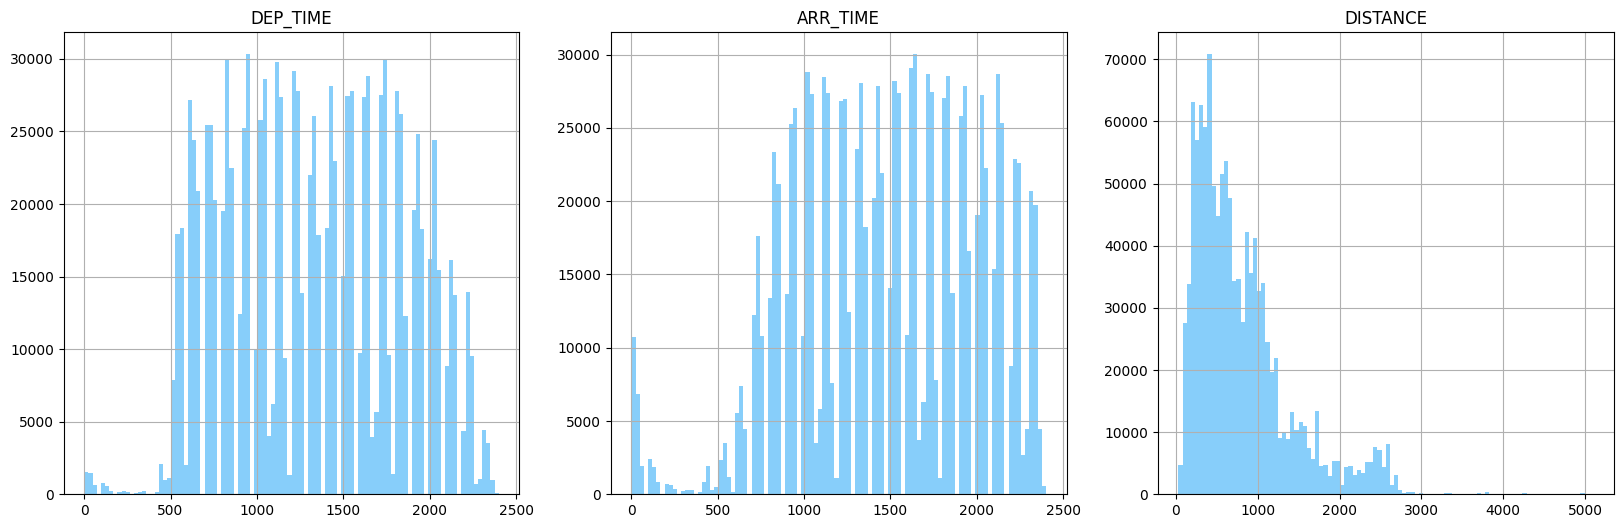

In [515]:
# Selecting only continuous columns
continuous_columns = ['DEP_TIME', 'ARR_TIME', 'DISTANCE']
continuous_df = df[continuous_columns]

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_columns), figsize=(20, 6))

for i, column in enumerate(continuous_columns):
    axes[i].hist(continuous_df[column], bins=100, color='lightskyblue')
    axes[i].set_title(column)
    axes[i].grid()

plt.show()


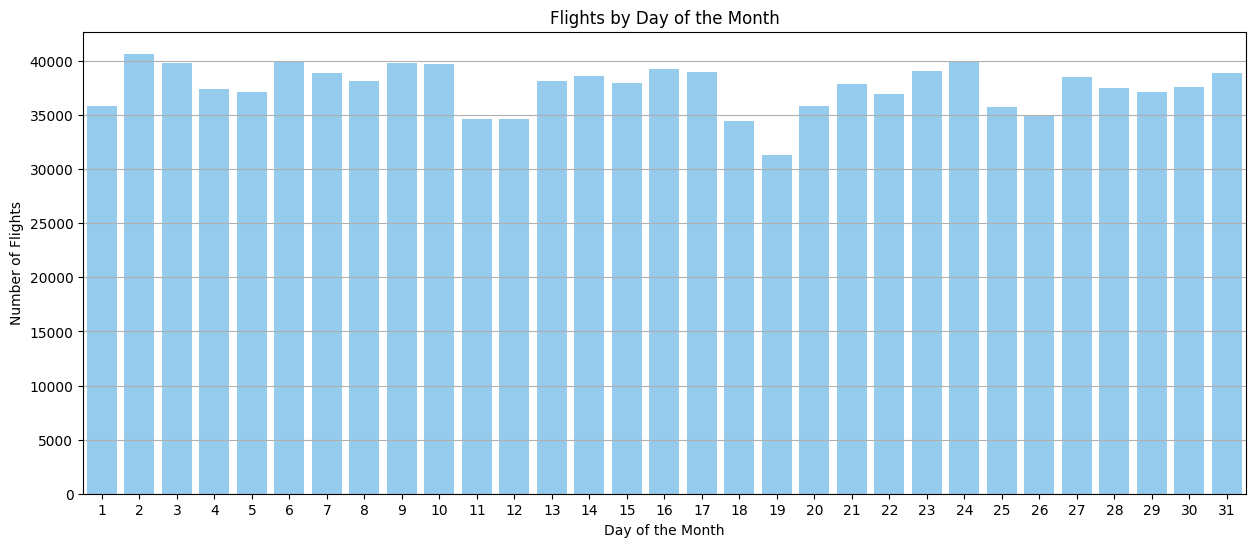

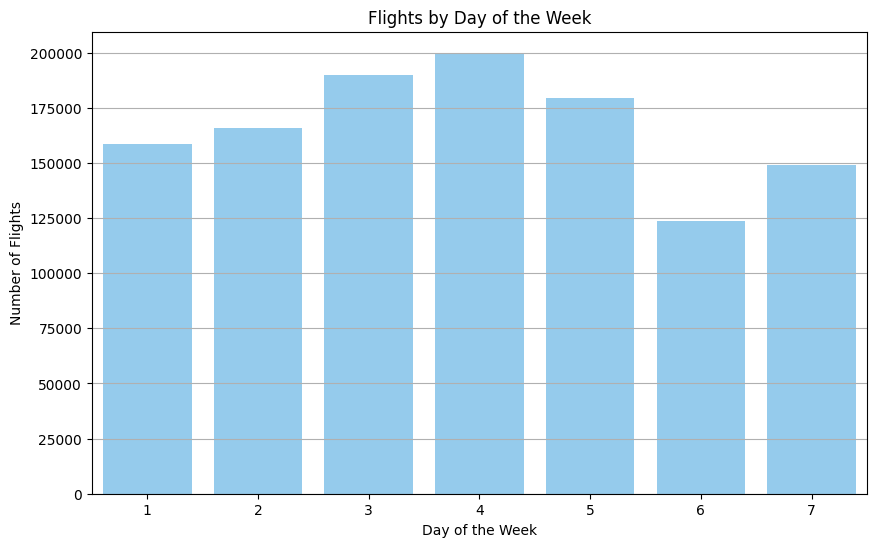

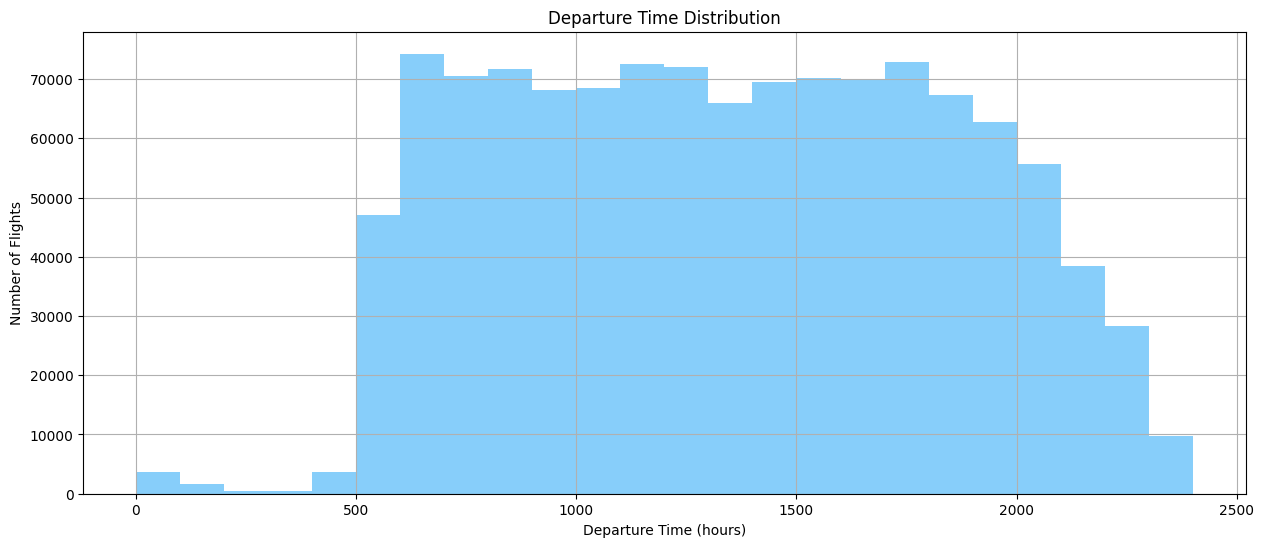

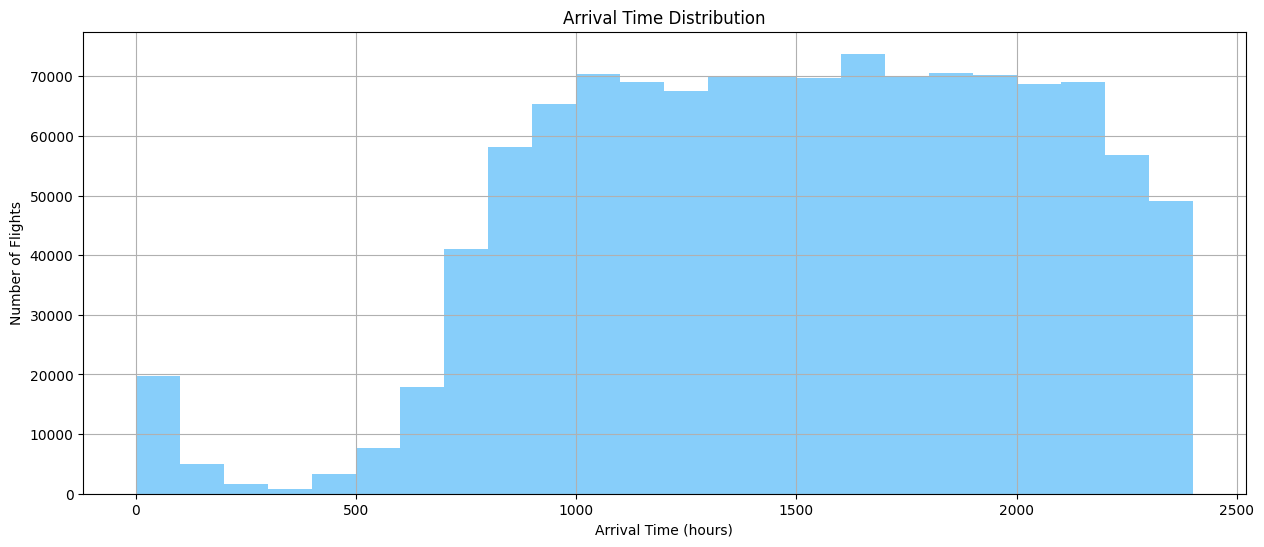

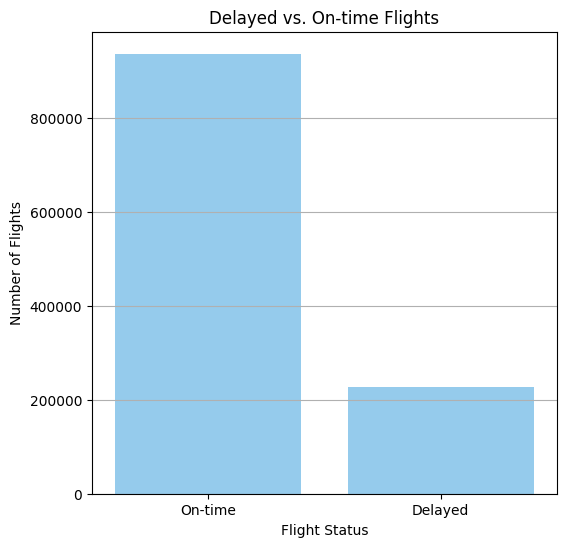

In [516]:
# DAY_OF_MONTH
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='DAY_OF_MONTH', color='lightskyblue')
plt.title('Flights by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.grid(axis='y')
plt.show()

# DAY_OF_WEEK
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_WEEK', color='lightskyblue')
plt.title('Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.grid(axis='y')
plt.show()

# DEP_TIME
plt.figure(figsize=(15, 6))
plt.hist(df['DEP_TIME'], bins=24, color='lightskyblue')
plt.title('Departure Time Distribution')
plt.xlabel('Departure Time (hours)')
plt.ylabel('Number of Flights')
plt.grid()
plt.show()

# ARR_TIME
plt.figure(figsize=(15, 6))
plt.hist(df['ARR_TIME'], bins=24, color='lightskyblue')
plt.title('Arrival Time Distribution')
plt.xlabel('Arrival Time (hours)')
plt.ylabel('Number of Flights')
plt.grid()
plt.show()

# DELAYED
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='DELAYED', color='lightskyblue')
plt.title('Delayed vs. On-time Flights')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.grid(axis='y')
plt.xticks([0, 1], ['On-time', 'Delayed'])
plt.show()


## Checking percentage of delayed flights

In [517]:
print(f"Delayed flights: {round((num_delayed/len(df))*100,2)}%")

Delayed flights: 19.53%


## Checking outliers

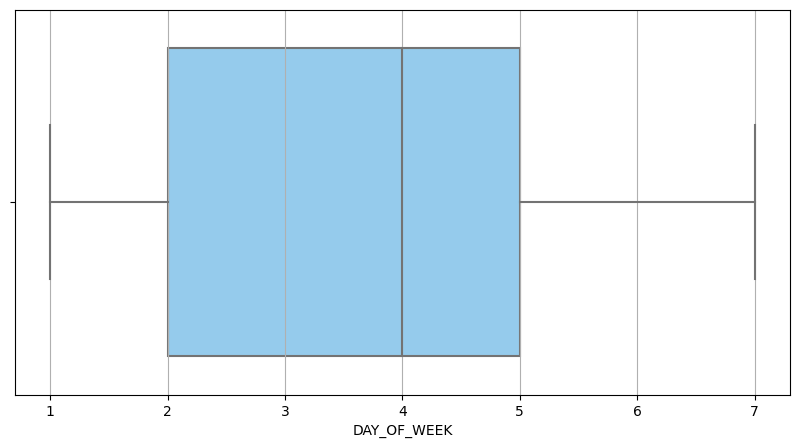

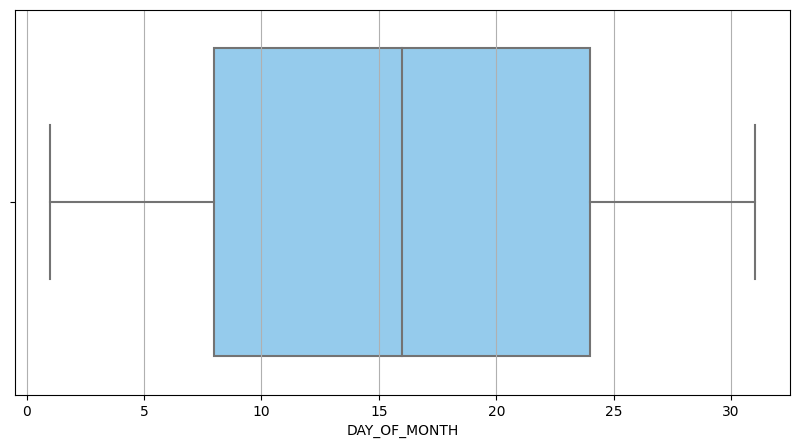

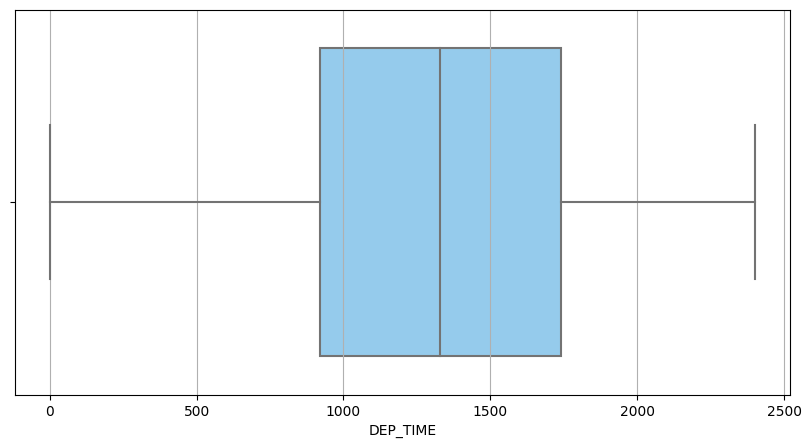

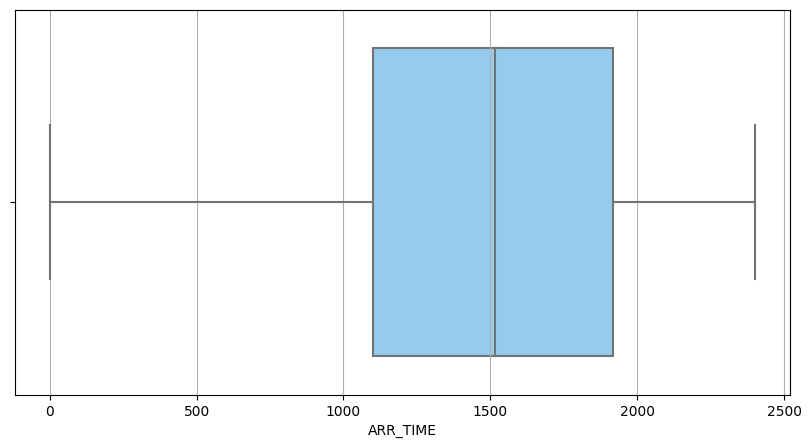

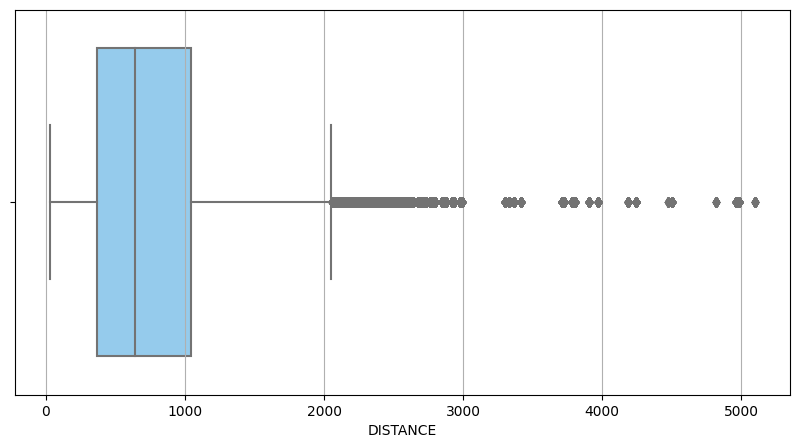

In [518]:
# Selecting only relevant columns for outliers
outliers_columns = ['DAY_OF_WEEK', 'DAY_OF_MONTH', 'DEP_TIME', 'ARR_TIME', 'DISTANCE']
outliers_df = df[outliers_columns]

def check_outliers(outliers_df):
    for col in outliers_columns:
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.grid()
        sns.boxplot(x=outliers_df[col], color='lightskyblue', whis=1.5)  # Adjust the whis parameter
        plt.show()

check_outliers(outliers_df)

The only variable that shows indications of outliers is "DISTANCE". However we won't handle this scenario since it is possible that a person may have taken a flight between two distant countries, resulting in a significant distance that would be considered an outlier in our data. Therefore, we won't change the distance data.

## Checking variable correlation

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_6519/25970663.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


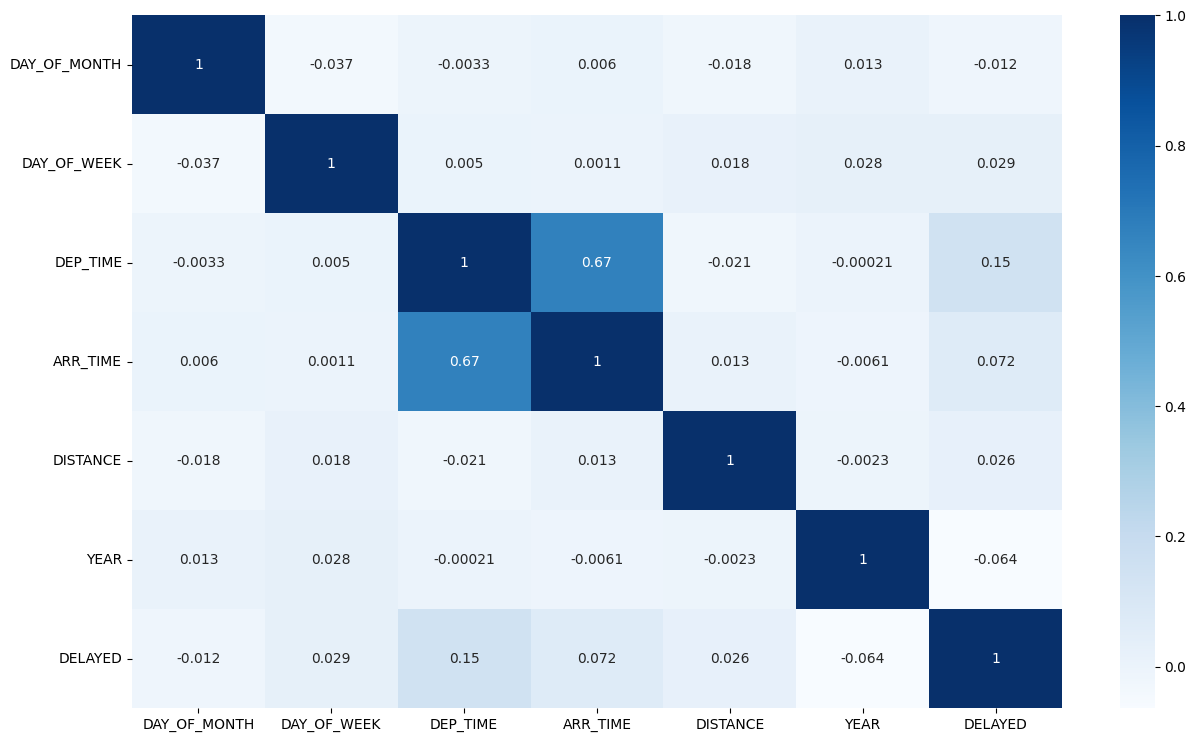

In [520]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

As we can see, the variables don't have much correlation except for arrival time and departure time which makes sence.

## Encoding the "YEAR" variable

In [521]:
df['YEAR'] = pd.factorize(df['YEAR'])[0]
df['is_2020'] = (df['YEAR'] == 1).astype(int)
df['is_2019'] = (df['YEAR'] == 0).astype(int)

# Delete the original "year" column
df.drop('YEAR', axis=1, inplace=True)

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,DELAYED,is_2020,is_2019
0,1,2,9E,GNV,ATL,601.0,0600-0659,722.0,300.0,0,0,1
1,1,2,9E,MSP,CVG,1359.0,1400-1459,1633.0,596.0,0,0,1
2,1,2,9E,DTW,CVG,1215.0,1200-1259,1329.0,229.0,0,0,1
3,1,2,9E,TLH,ATL,1521.0,1500-1559,1625.0,223.0,0,0,1
4,1,2,9E,ATL,FSM,1847.0,1900-1959,1940.0,579.0,0,0,1


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165229 entries, 0 to 607345
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DAY_OF_MONTH       1165229 non-null  int64  
 1   DAY_OF_WEEK        1165229 non-null  int64  
 2   OP_UNIQUE_CARRIER  1165229 non-null  object 
 3   ORIGIN             1165229 non-null  object 
 4   DEST               1165229 non-null  object 
 5   DEP_TIME           1165229 non-null  float64
 6   DEP_TIME_BLK       1165229 non-null  object 
 7   ARR_TIME           1165229 non-null  float64
 8   DISTANCE           1165229 non-null  float64
 9   DELAYED            1165229 non-null  int64  
 10  is_2020            1165229 non-null  int64  
 11  is_2019            1165229 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 115.6+ MB


## Encoding all object variables

In [523]:
def encode_categories(features):
    lb_make = LabelEncoder()
    for i in range(len(features)):
        df[features[i]] = lb_make.fit_transform(df[features[i]])

In [524]:
encode_categories(['OP_UNIQUE_CARRIER', 'ORIGIN' , 'DEST' , 'DEP_TIME_BLK'])

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165229 entries, 0 to 607345
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DAY_OF_MONTH       1165229 non-null  int64  
 1   DAY_OF_WEEK        1165229 non-null  int64  
 2   OP_UNIQUE_CARRIER  1165229 non-null  int64  
 3   ORIGIN             1165229 non-null  int64  
 4   DEST               1165229 non-null  int64  
 5   DEP_TIME           1165229 non-null  float64
 6   DEP_TIME_BLK       1165229 non-null  int64  
 7   ARR_TIME           1165229 non-null  float64
 8   DISTANCE           1165229 non-null  float64
 9   DELAYED            1165229 non-null  int64  
 10  is_2020            1165229 non-null  int64  
 11  is_2019            1165229 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 115.6 MB


## Full correlation map

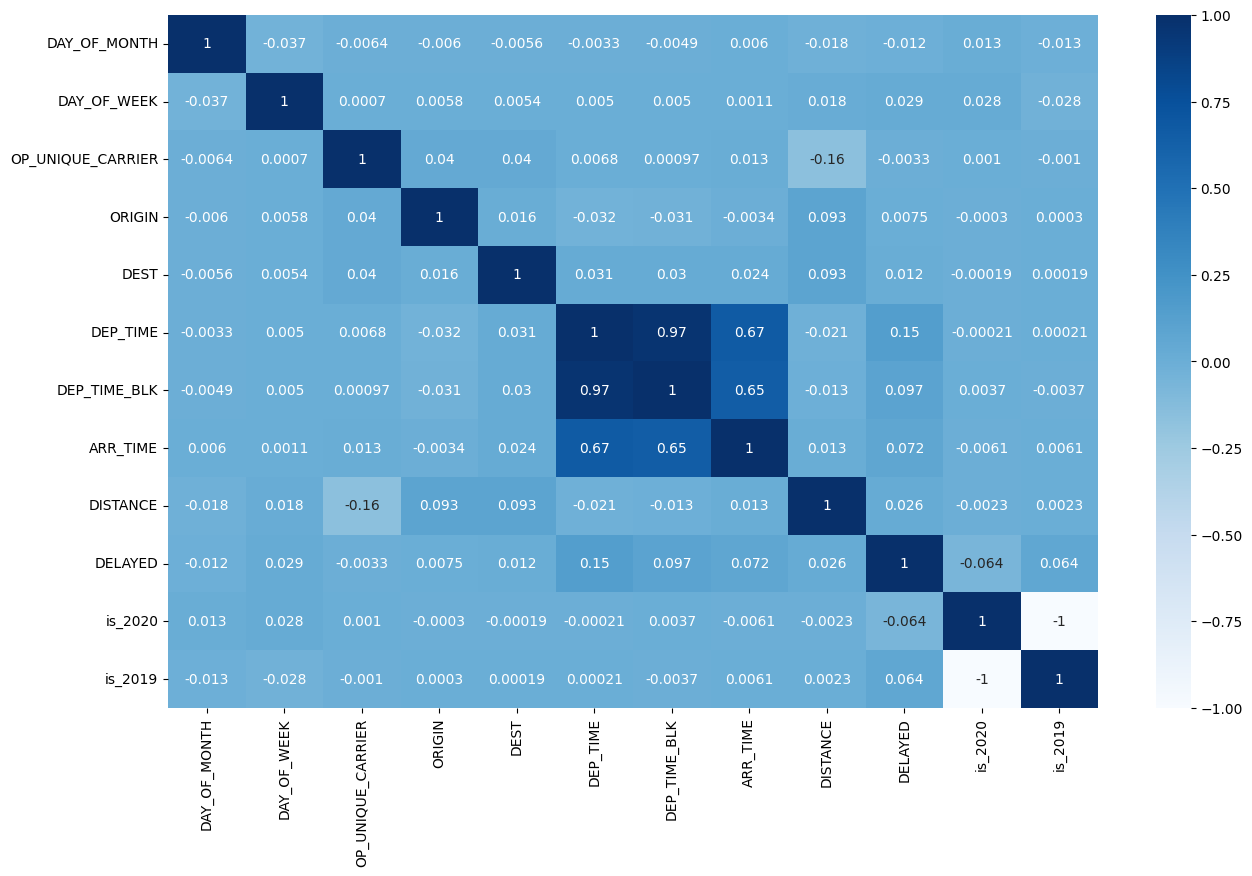

In [526]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

Due to the high correlation between the DEP_TIME_BLK and DEP_TIME variable, we dropped the DEP_TIME_BLK variable. However, the cross validation and model scores improve when including it in the dataset. Hence, it is logical to include it.

In [527]:
# Dropping the variable 
#df = df.drop(columns=['DEP_TIME_BLK'])

## Balancing dataset

In [528]:
# Divide by class
count_ontime, count_delayed = df.DELAYED.value_counts()
ontime = df[df.DELAYED == 0]
delayed = df[df.DELAYED == 1]
test = pd.concat([ontime, delayed], axis=0)

# Check balance of dataset
print('Balance of dataset:')
print(test.DELAYED.value_counts())


Balance of dataset:
0    937714
1    227515
Name: DELAYED, dtype: int64


In [529]:
# Undersampling the dataset with sklearn.resample based on exited users
ontime_under = ontime.sample(count_delayed)  # Sample count_delayed instances from the ontime class
bln = pd.concat([ontime_under, delayed], axis=0)

print('Random under-sampling:')
print(bln.DELAYED.value_counts())
print()

Random under-sampling:
0    227515
1    227515
Name: DELAYED, dtype: int64



# 5. Modeling and predicting the data

In [530]:
# Dropping target variable
X = df.drop('DELAYED',axis=1)
y = df['DELAYED']

In [531]:
X.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,is_2020,is_2019
0,1,2,0,130,19,601.0,1,722.0,300.0,0,1
1,1,2,0,227,82,1359.0,9,1633.0,596.0,0,1
2,1,2,0,97,82,1215.0,7,1329.0,229.0,0,1
3,1,2,0,331,19,1521.0,10,1625.0,223.0,0,1
4,1,2,0,19,122,1847.0,14,1940.0,579.0,0,1


In [532]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: DELAYED, dtype: int64

## Splitting the data into train and test data

In [533]:
# Splitting the train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [534]:
print(f'Shape X train: {x_train.shape}')
print(f'Shape X test: {x_test.shape}')
print(f'Shape y train: {y_train.shape}')
print(f'Shape y test: {y_test.shape}')

Shape X train: (932183, 11)
Shape X test: (233046, 11)
Shape y train: (932183,)
Shape y test: (233046,)


## Scaling the data

In [535]:
# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [537]:
def evaluate_model(y_true, y_pred, model_name, cv_scores=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print(f"---- {model_name} ----")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}\n")

    if cv_scores is not None:
        cv_accuracy = cv_scores.mean()
        print(f"Cross-Validation Accuracy: {cv_accuracy:.4f}")


### A. Logistic Regression

In [538]:
# Defining model
logreg = LogisticRegression(random_state=42, max_iter=3000)

#Cross validation
logreg_scores = cross_val_score(logreg, X, y, cv=cv, scoring='roc_auc')

# Fitting and predicting model
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

# Model evaluation
evaluate_model(y_test, y_pred_logreg, "Logistic Regression", cv_scores=logreg_scores)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

---- Logistic Regression ----
Accuracy: 0.8468
Precision: 0.9961
Recall: 0.2196
F1-score: 0.3598
Confusion Matrix:
[[187323     39]
 [ 35653  10031]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    187362
           1       1.00      0.22      0.36     45684

    accuracy                           0.85    233046
   macro avg       0.92      0.61      0.64    233046
weighted avg       0.87      0.85      0.80    233046


Cross-Validation Accuracy: 0.7910


### B. Decision Tree

In [539]:
# Defining model
dtree = DecisionTreeClassifier(random_state=42)

#Cross validation
dtree_scores = cross_val_score(dtree, X, y, cv=cv, scoring='roc_auc')

# Fitting and predicting model
dtree.fit(x_train, y_train)
y_pred_dtree = dtree.predict(x_test)

# Model evaluation
evaluate_model(y_test, y_pred_dtree, "Decision Tree", cv_scores=dtree_scores)

---- Decision Tree ----
Accuracy: 0.8894
Precision: 0.7232
Recall: 0.7059
F1-score: 0.7144
Confusion Matrix:
[[175016  12346]
 [ 13435  32249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    187362
           1       0.72      0.71      0.71     45684

    accuracy                           0.89    233046
   macro avg       0.83      0.82      0.82    233046
weighted avg       0.89      0.89      0.89    233046


Cross-Validation Accuracy: 0.8205


### C. Random Forest

In [547]:
# Tuning hyperparameters
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Defining model and using Grid Search
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Providing best hyperparameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters:", best_params)

# Prediciting model with best estimators
y_pred = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=  22.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=  22.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=  23.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=  23.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=  23.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.5min
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.5min
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.5min
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  13.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  14.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  14.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  14.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  13.9s
[CV] END criterion=gini, max_depth=None, min_sam

In [540]:
# Defining model
randomforest = RandomForestClassifier(random_state=42)

#Cross validation
randomforest_scores = cross_val_score(randomforest, X, y, cv=cv, scoring='roc_auc')

# Fitting and predicting model

randomforest.fit(x_train, y_train)
y_pred_randomforest = randomforest.predict(x_test)

# Model evaluation
evaluate_model(y_test, y_pred_randomforest, "Random Forest", cv_scores=randomforest_scores)

---- Random Forest ----
Accuracy: 0.9091
Precision: 0.9357
Recall: 0.5760
F1-score: 0.7130
Confusion Matrix:
[[185553   1809]
 [ 19370  26314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    187362
           1       0.94      0.58      0.71     45684

    accuracy                           0.91    233046
   macro avg       0.92      0.78      0.83    233046
weighted avg       0.91      0.91      0.90    233046


Cross-Validation Accuracy: 0.9403


### D. Gradient Boosting

In [541]:
# Defining model
gradientboost = GradientBoostingClassifier(random_state=42)

#Cross validation
gradientboost_scores = cross_val_score(gradientboost, X, y, cv=cv, scoring='roc_auc')

# Fitting and predicting model
gradientboost.fit(x_train, y_train)
y_pred_gradientboost = gradientboost.predict(x_test)

# Model evaluation
evaluate_model(y_test, y_pred_gradientboost, "Gradient Boosting", cv_scores=gradientboost_scores)

---- Gradient Boosting ----
Accuracy: 0.8755
Precision: 0.9588
Recall: 0.3813
F1-score: 0.5456
Confusion Matrix:
[[186613    749]
 [ 28264  17420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93    187362
           1       0.96      0.38      0.55     45684

    accuracy                           0.88    233046
   macro avg       0.91      0.69      0.74    233046
weighted avg       0.89      0.88      0.85    233046


Cross-Validation Accuracy: 0.8461


### E. K-Nearest Neighbor

In [542]:
# Defining model
knn = KNeighborsClassifier()

#Cross validation
knn_scores = cross_val_score(knn, X, y, cv=cv)

# Fitting and predicting model
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Model evaluation
evaluate_model(y_test, y_pred_logreg, "Logistic Regression", cv_scores=knn_scores)

---- Logistic Regression ----
Accuracy: 0.8468
Precision: 0.9961
Recall: 0.2196
F1-score: 0.3598
Confusion Matrix:
[[187323     39]
 [ 35653  10031]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    187362
           1       1.00      0.22      0.36     45684

    accuracy                           0.85    233046
   macro avg       0.92      0.61      0.64    233046
weighted avg       0.87      0.85      0.80    233046


Cross-Validation Accuracy: 0.8572


### F. AdaBoost

In [543]:
# Defining model
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Cross validation
adaboost_scores = cross_val_score(adaboost, X, y, cv=cv, scoring='roc_auc')

# Fitting and predicting model
adaboost.fit(x_train, y_train)
y_pred_adaboost = adaboost.predict(x_test)

# Model evaluation
evaluate_model(y_test, y_pred_adaboost, "AdaBoost", cv_scores=adaboost_scores)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/

---- AdaBoost ----
Accuracy: 0.8892
Precision: 0.7223
Recall: 0.7064
F1-score: 0.7143
Confusion Matrix:
[[174958  12404]
 [ 13414  32270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    187362
           1       0.72      0.71      0.71     45684

    accuracy                           0.89    233046
   macro avg       0.83      0.82      0.82    233046
weighted avg       0.89      0.89      0.89    233046


Cross-Validation Accuracy: 0.8207


### G. XGBoost

In [544]:
# Defining model
xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Cross validation
xgboost_scores = cross_val_score(xgboost, X, y, cv=cv, scoring='roc_auc')

# Fitting and predicting model
xgboost.fit(x_train, y_train)
y_pred_xgboost = xgboost.predict(x_test)

# Model evaluation
evaluate_model(y_test, y_pred_xgboost, "XGBoost", cv_scores=xgboost_scores)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1

---- XGBoost ----
Accuracy: 0.9020
Precision: 0.9218
Recall: 0.5464
F1-score: 0.6861
Confusion Matrix:
[[185246   2116]
 [ 20724  24960]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94    187362
           1       0.92      0.55      0.69     45684

    accuracy                           0.90    233046
   macro avg       0.91      0.77      0.81    233046
weighted avg       0.90      0.90      0.89    233046


Cross-Validation Accuracy: 0.9043
